In [146]:
# import all the python packages needed for the project.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing  import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
#from google.colab import files
#upload = files.upload()
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from scipy.stats import norm
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

houses=pd.read_csv("train.csv")

In [147]:
# ligh level review of the dataset summery for manual feature elimination if any can be done this time.
houses.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [148]:
#?  sns.scatterplot
# Check on  numeric columns for analysing the relation with the target column SalePrice
houses_num = houses.select_dtypes(include=['int64', 'float64'])
houses_cat = houses.select_dtypes(include=['object'])
 
print(houses_num.columns)
print(houses_cat.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', '

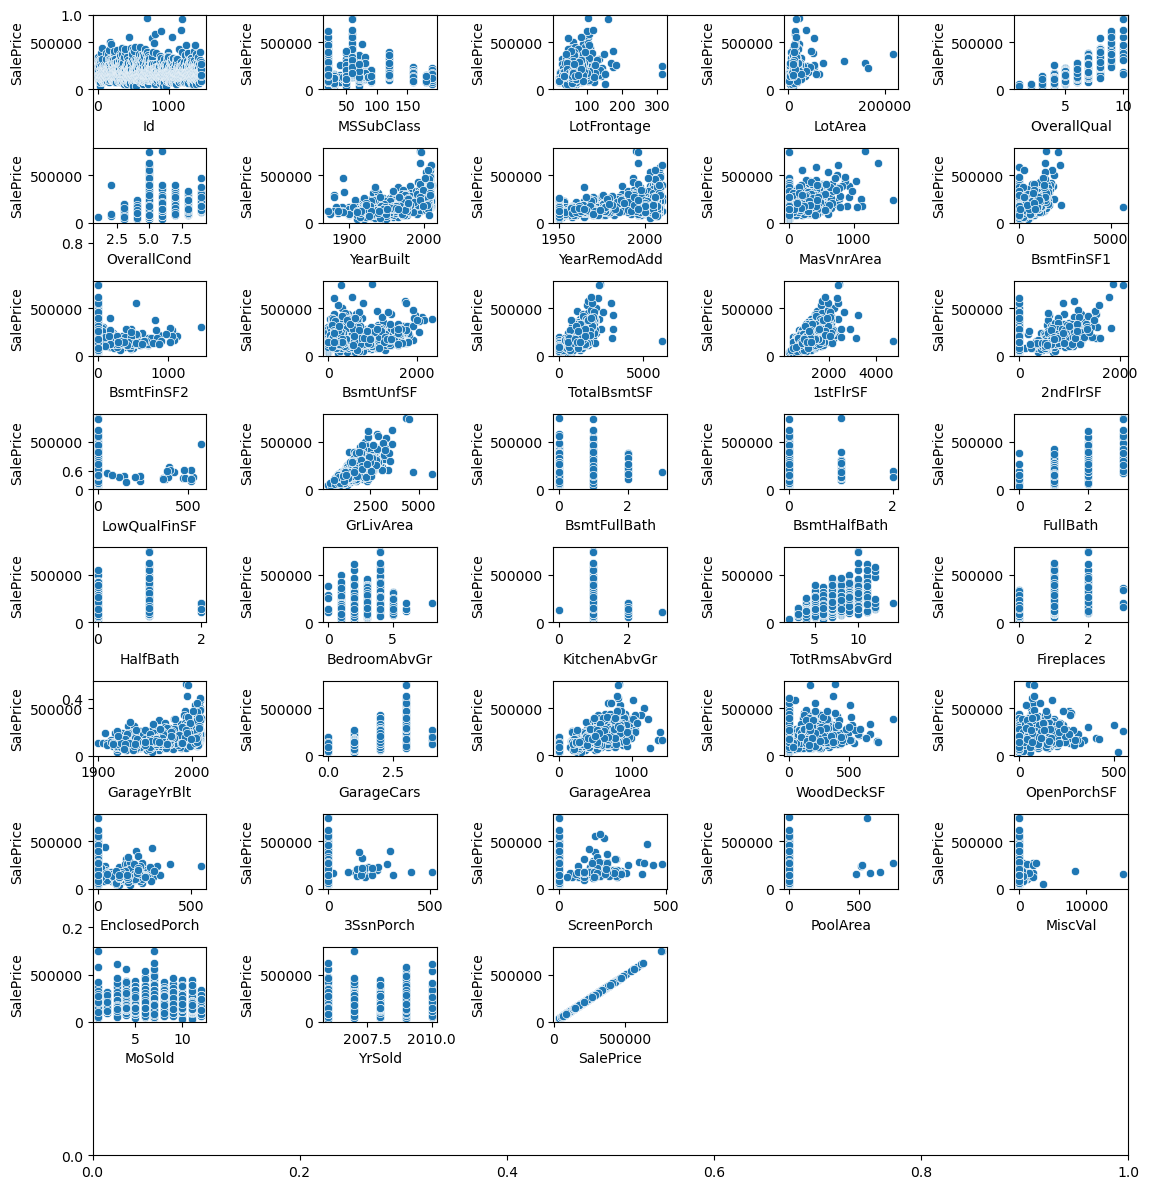

In [149]:

# Plot these feature with SalePrice feature and observe the data trend.

fig=plt.subplots(figsize=(12, 12))

#for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']):
for i, col in enumerate(houses_num.columns):
    plt.subplot(9, 5, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=houses[col], y=houses['SalePrice'])
    plt.tight_layout()

In [116]:
#Calcutae the outliers for all the features and srot them in descending order.
housing_df=houses
percentage={}
numeric_df=houses_num

# Add all percentage of predictors between pervcentiler 25% to 75% to the array.
for feature in numeric_df.columns:
    IQR_val=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR_val)) |
                     (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR_val))].shape[0]
    percentage[feature]=round(count/numeric_df.shape[0]*100,2)
    #print(percentage)
   
# Sort predictors by percentages by descending order.    
outliers=pd.DataFrame({'Predictors':list(percentage.keys()),'Percentage':list(percentage.values())})
outliers.sort_values(by="Percentage", ascending=False)
 

Predictors  Percentage
30  EnclosedPorch       14.25
10     BsmtFinSF2       11.44
5     OverallCond        8.56
32    ScreenPorch        7.95
1      MSSubClass        7.05
8      MasVnrArea        6.58
2     LotFrontage        6.03
18   BsmtHalfBath        5.62
29    OpenPorchSF        5.27
3         LotArea        4.73
22   KitchenAbvGr        4.66
12    TotalBsmtSF        4.18
37      SalePrice        4.18
34        MiscVal        3.56
21   BedroomAbvGr        2.40
28     WoodDeckSF        2.19
16      GrLivArea        2.12
23   TotRmsAbvGrd        2.05
11      BsmtUnfSF        1.99
15   LowQualFinSF        1.78
31      3SsnPorch        1.64
27     GarageArea        1.44
13       1stFlrSF        1.37
9      BsmtFinSF1        0.48
33       PoolArea        0.48
6       YearBuilt        0.48
24     Fireplaces        0.34
26     GarageCars        0.34
14       2ndFlrSF        0.14
4     OverallQual        0.14
17   BsmtFullBath        0.07
35         MoSold        0.00
36         YrSold        0.00
0              Id        0.00
25    GarageYrBlt        0.00
20       HalfBath        0.00
7    YearRemodAdd        0.00
19       FullBath        0.00

In [150]:
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [151]:
# Iterates through each numerical column, excluding the 'SalePrice' column, 
# and caps or truncates values that are considered as outliers.

for col,per in percentage.items():
    if col!='SalePrice':
        IQR = numeric_df[col].quantile(.75) - numeric_df[col].quantile(.25) 
        max_value = numeric_df[col].quantile(.75)+1.5*IQR
        min_value = numeric_df[col].quantile(.25)-1.5*IQR
        numeric_df[col][numeric_df[col] > max_value] = max_value
        numeric_df[col][numeric_df[col] < min_value ] = min_value

In [152]:
# Review the column description  and find the feature that does not contribute to the model selection.

#houses_numeric = houses.select_dtypes(include=['int64', 'float64'])
#categorical_df = houses.select_dtypes(include=['object'])


numeric_df.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000   1460.000000  1460.000000   
mean    730.500000    55.085616    69.134888   9647.388014     6.100685   
std     421.610009    37.508183    19.662022   3594.356399     1.378430   
min       1.000000    20.000000    27.500000   1481.500000     2.000000   
25%     365.750000    20.000000    59.000000   7553.500000     5.000000   
50%     730.500000    50.000000    69.000000   9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000  11601.500000     7.000000   
max    1460.000000   145.000000   111.500000  17673.500000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.543493  1971.299315   1984.865753    90.192149   439.997517  ...   
std       0.963696    30.108397     20.645407   134.925253   433.219435  ...   
min       3.500000  1885.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       7.500000  2010.000000   2010.000000   415.000000  1780.625000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000         1460.0     1460.0       1460.0   
mean     91.806849    42.603425            0.0        0.0          0.0   
std     116.658120    52.501584            0.0        0.0          0.0   
min       0.000000     0.000000            0.0        0.0          0.0   
25%       0.000000     0.000000            0.0        0.0          0.0   
50%       0.000000    25.000000            0.0        0.0          0.0   
75%     168.000000    68.000000            0.0        0.0          0.0   
max     420.000000   170.000000            0.0        0.0          0.0   

       PoolArea  MiscVal       MoSold       YrSold      SalePrice  
count    1460.0   1460.0  1460.000000  1460.000000    1460.000000  
mean        0.0      0.0     6.321918  2007.815753  180921.195890  
std         0.0      0.0     2.703626     1.328095   79442.502883  
min         0.0      0.0     1.000000  2006.000000   34900.000000  
25%         0.0      0.0     5.000000  2007.000000  129975.000000  
50%         0.0      0.0     6.000000  2008.000000  163000.000000  
75%         0.0      0.0     8.000000  2009.000000  214000.000000  
max         0.0      0.0    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

<Axes: >

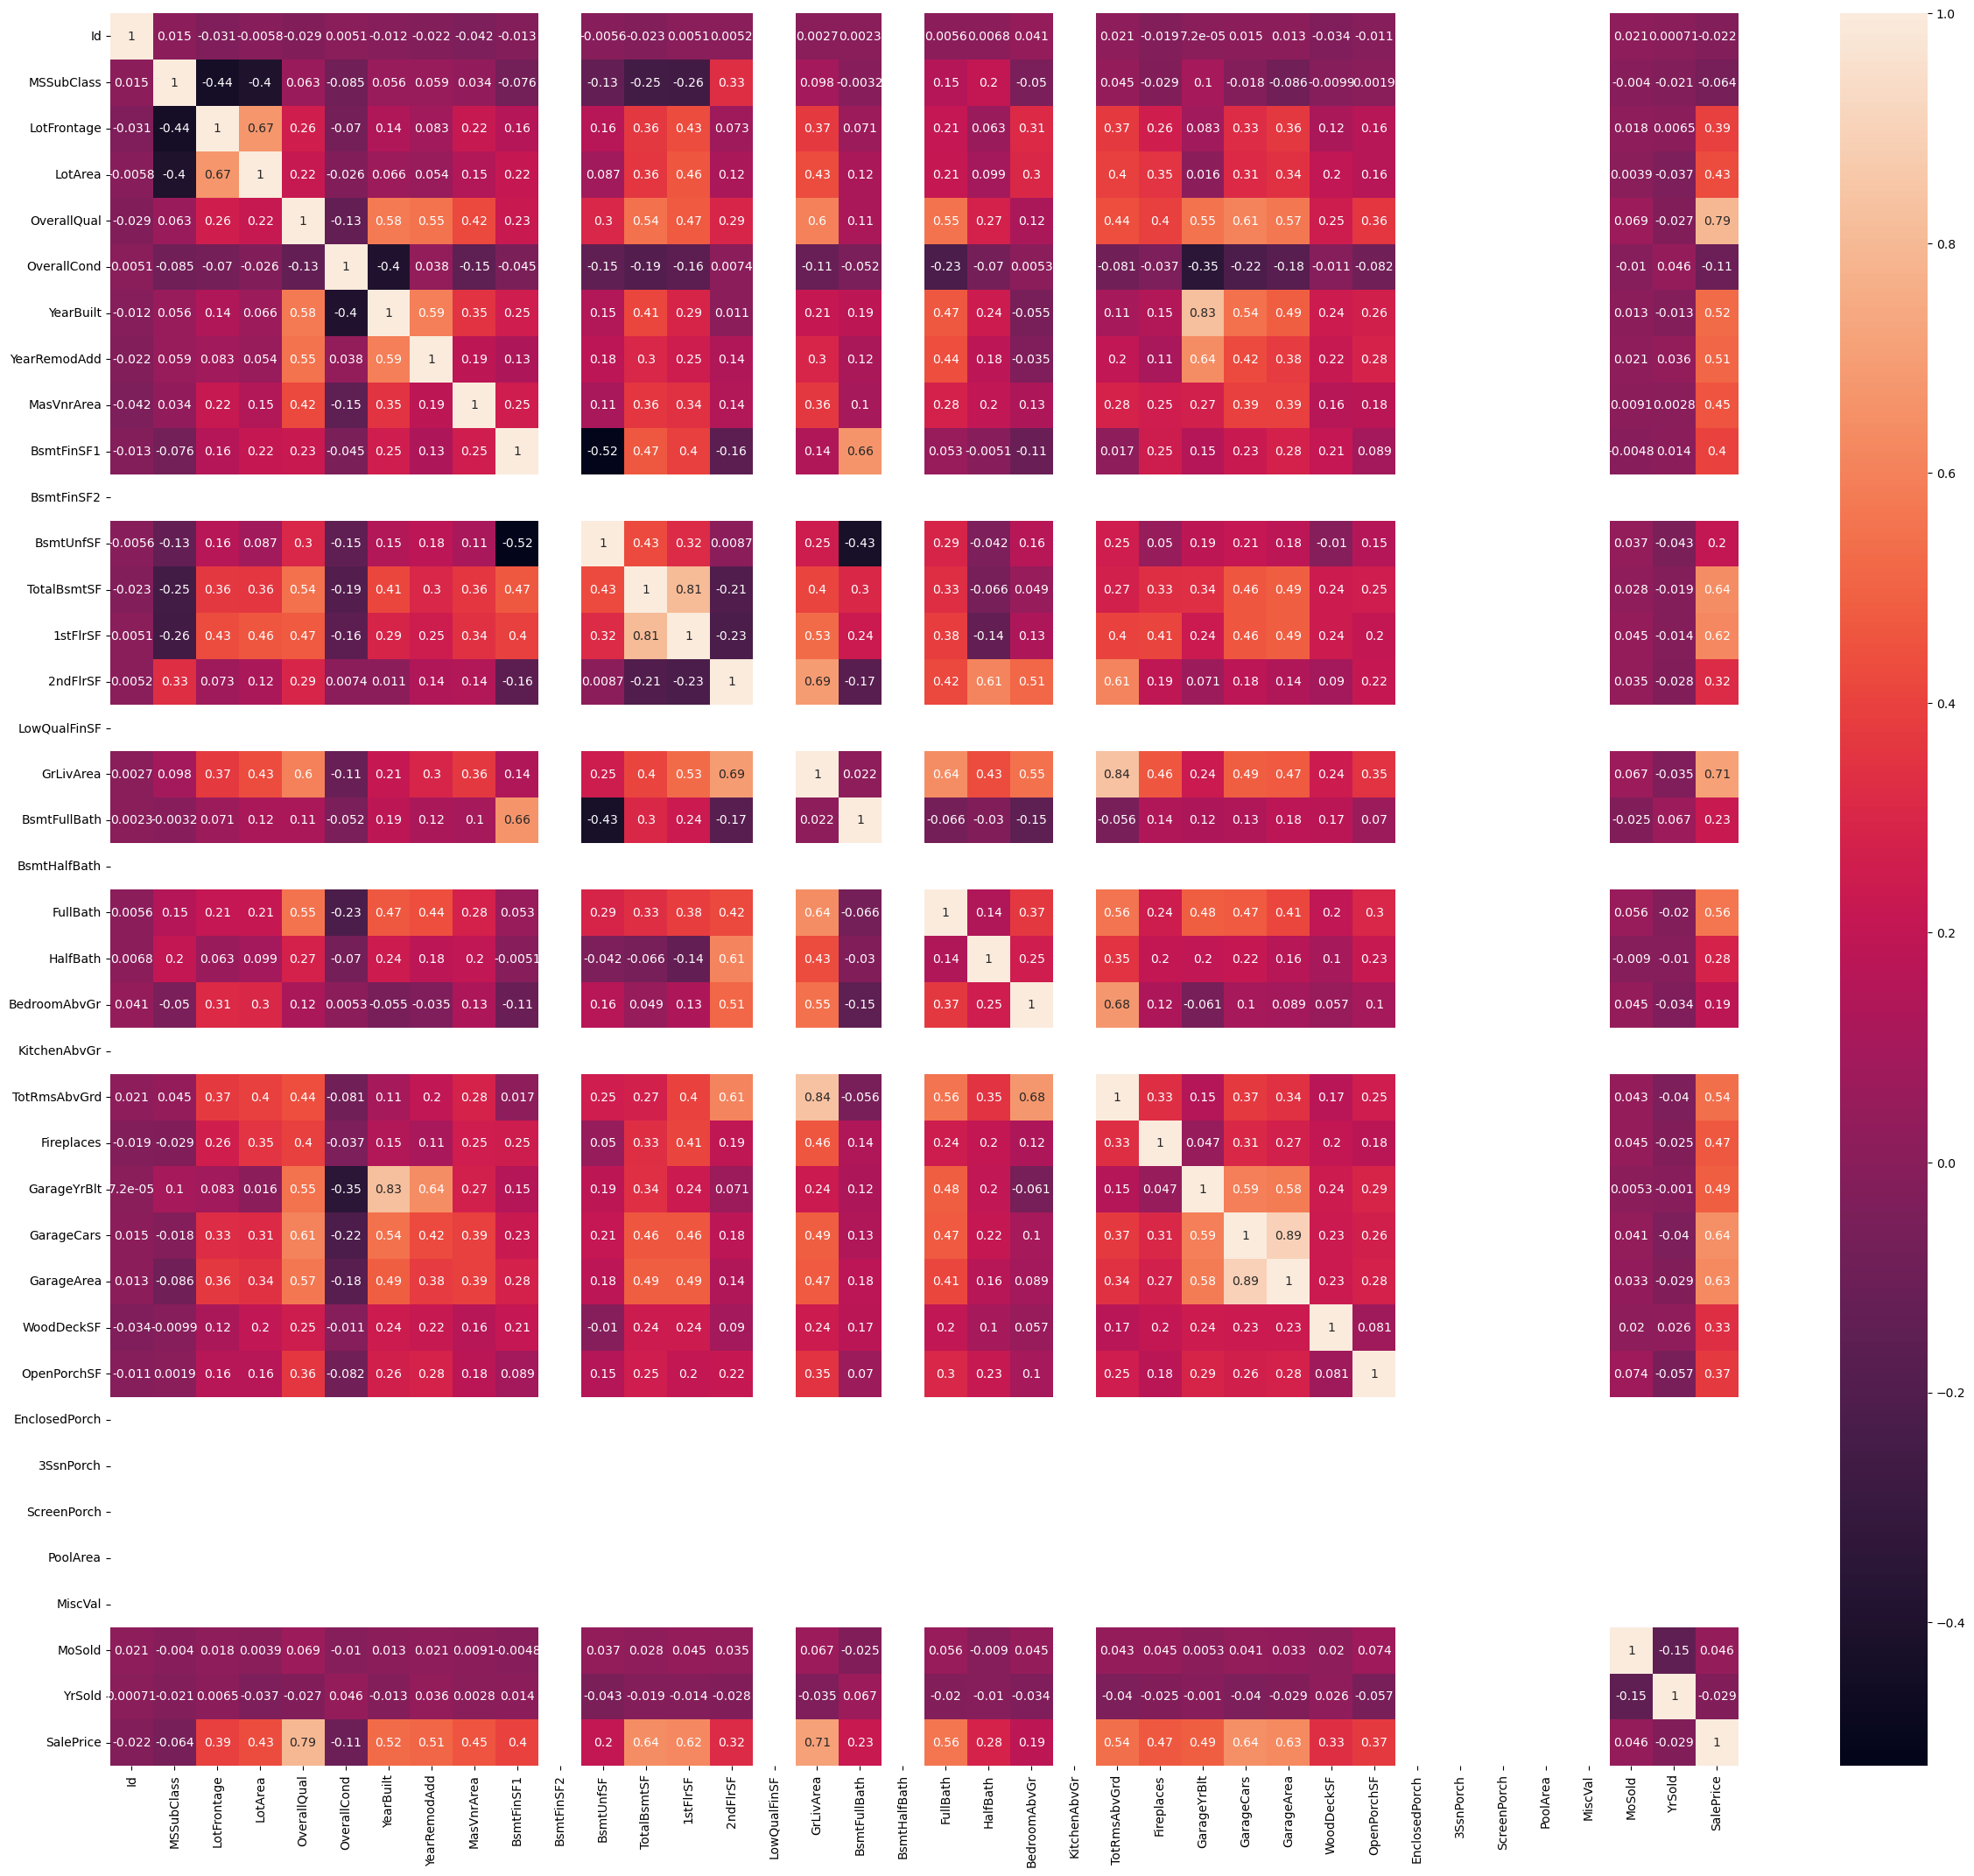

In [153]:
# Find the colliniarity relationship between columns to identity the values more then .7 and finalize the selection or removal.

plt.figure(figsize=(30,26))
sns.heatmap(numeric_df.corr(),annot=True)
# iplt.show()

In [154]:
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [155]:

for i in range(0, len(housing_df.columns), 10):
    subset_of_columns = housing_df.iloc[:, i:i+10]
    description = subset_of_columns.describe()
    
    print(f"Summary statistics for columns {i+1} to {i+10}:")
    print(description)
    print("\n")

Summary statistics for columns 1 to 10:
                Id   MSSubClass  LotFrontage        LotArea
count  1460.000000  1460.000000  1201.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082
std     421.610009    42.300571    24.284752    9981.264932
min       1.000000    20.000000    21.000000    1300.000000
25%     365.750000    20.000000    59.000000    7553.500000
50%     730.500000    50.000000    69.000000    9478.500000
75%    1095.250000    70.000000    80.000000   11601.500000
max    1460.000000   190.000000   313.000000  215245.000000


Summary statistics for columns 11 to 20:
       OverallQual  OverallCond    YearBuilt
count  1460.000000  1460.000000  1460.000000
mean      6.099315     5.575342  1971.267808
std       1.382997     1.112799    30.202904
min       1.000000     1.000000  1872.000000
25%       5.000000     5.000000  1954.000000
50%       6.000000     5.000000  1973.000000
75%       7.000000     6.000000  2000.000000
max      10.00000

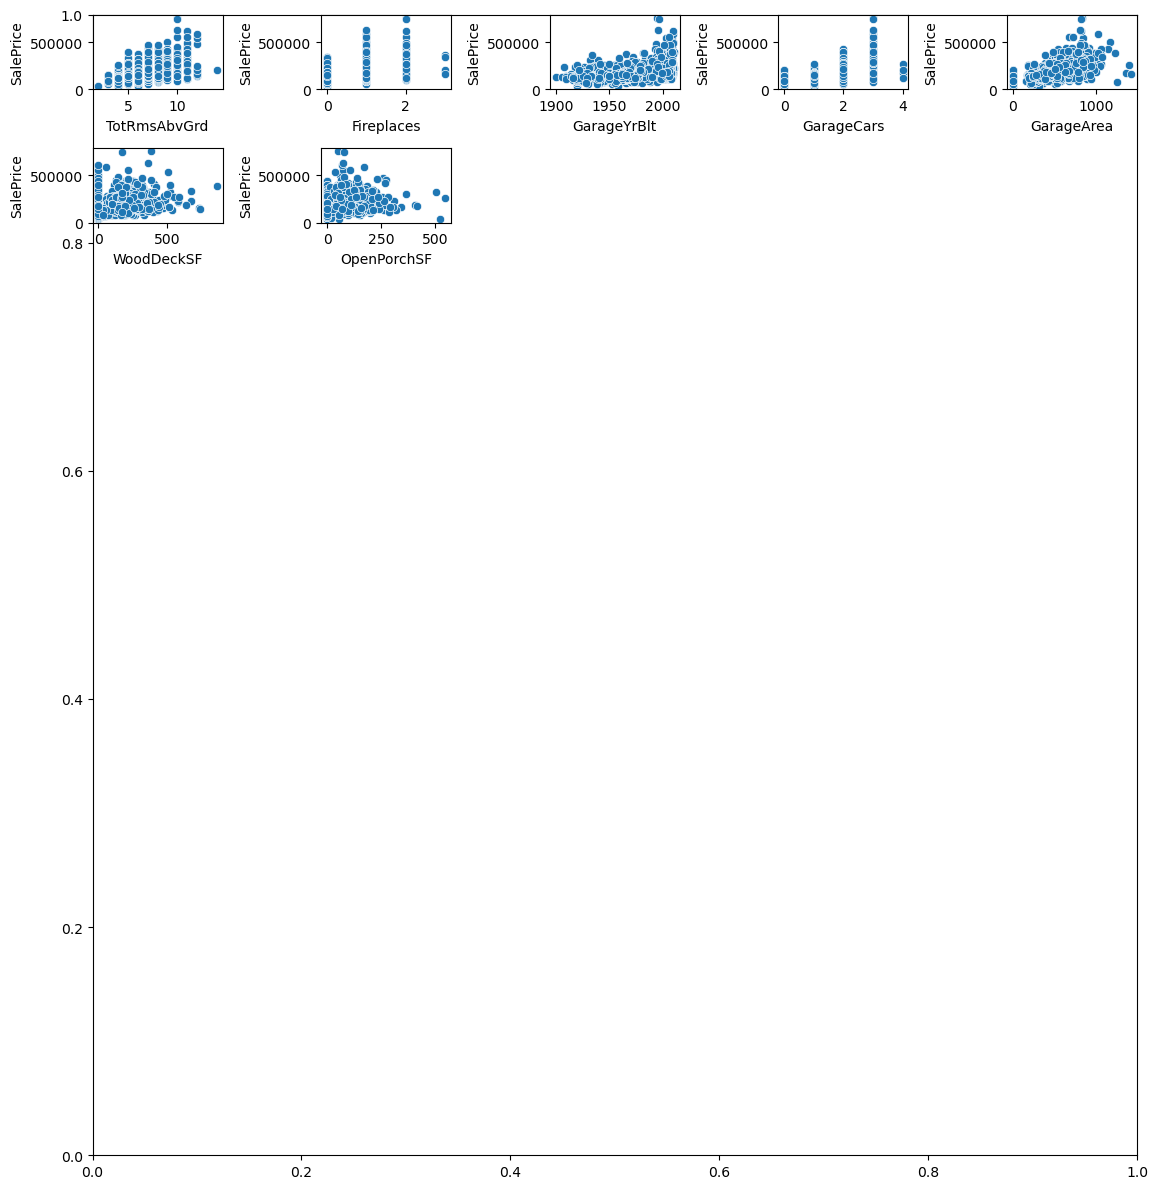

In [156]:
# FInd the features selected from the map and observer the trend with SalePrice.

fig=plt.subplots(figsize=(12, 12))

#for i, feature in enumerate(['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea']):
#for i, feature in enumerate(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr']):
for i, feature in enumerate(['TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF'           
]):
    plt.subplot(9, 5, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=houses[feature], y=houses['SalePrice'])
    plt.tight_layout()

In [157]:
housing_df=houses
housing_df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

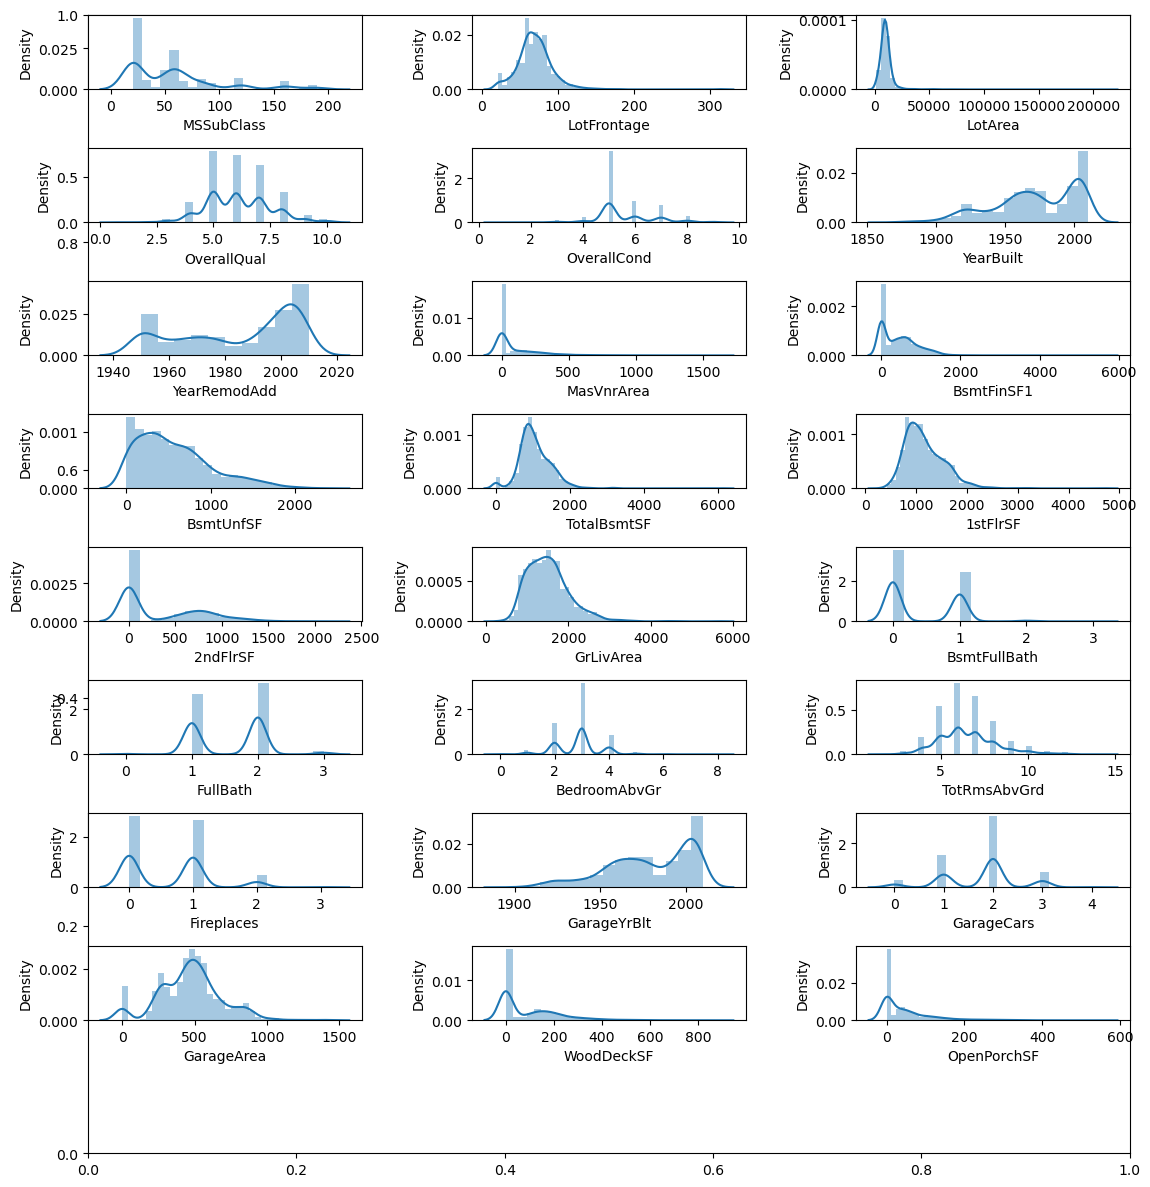

In [158]:
# Distribution of the numeric features observed 
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(housing_df[feature])
    plt.tight_layout()

In [159]:
# Dropping the features those are not contributing to thr model.

housing_df.drop(['Utilities','MiscVal','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','HalfBath','KitchenAbvGr'], axis=1, inplace=True)

# Checking the remaining columns
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'PoolQC', 'Fence',
       'MiscFeature', 'MoSold', 'YrSold', '

In [164]:
housing_df[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']]

OverallQual  OverallCond  MoSold  YrSold  BsmtFullBath  FullBath  \
0               7            5       2      16             1         2   
1               6            8       5      17             0         2   
2               7            5       9      16             1         2   
3               7            5       2      18             1         1   
4               8            5      12      16             1         2   
5               5            5      10      15             1         1   
6               8            5       8      17             1         2   
7               7            6      11      15             1         2   
8               7            5       4      16             0         2   
9               5            6       1      16             1         1   
10              5            5       2      16             1         1   
11              9            5       7      18             1         3   
12              5            6       9      16             1         1   
13              7            5       8      17             0         2   
14              6            5       5      16             1         1   
15              7            8       7      17             0         1   
16              6            7       3      14             1         1   
17              4            5      10      18             0         2   
18              5            5       6      16             1         1   
19              5            6       5      15             0         1   
20              8            5      11      18             0         3   
21              7            7       6      17             0         1   
22              8            5       9      16             0         2   
23              5            7       6      17             1         1   
24              5            8       5      14             1         1   
25              8            5       7      15             0         2   
26              5            7       5      14             0         1   
27              8            5       5      14             1         2   
28              5            6      12      18             1         1   
29              4            6       5      16             0         1   
30              4            4       7      16             0         1   
31              5            6       6      16             0         1   
32              8            5       1      16             0         2   
33              5            5       4      14             0         1   
34              9            5       8      17             1         2   
35              8            5       9      18             0         3   
36              5            5       6      15             0         1   
37              5            6      10      15             0         1   
38              5            7       1      14             1         1   
39              4            5       6      16             0         2   
40              6            5      12      18             0         2   
41              5            6       7      17             0         1   
42              5            7      12      17             1         1   
43              5            6       7      16             1         1   
44              5            6       5      18             1         1   
45              9            5       2      14             1         2   
46              7            5       8      15             1         1   
47              8            5       7      17             0         2   
48              4            5       6      15             0         2   
49              5            7       1      17             1         1   
50              6            6       7      17             0         2   
51              6            6       9      18             0         1   
52              5            5       5      14             1         1   
53        

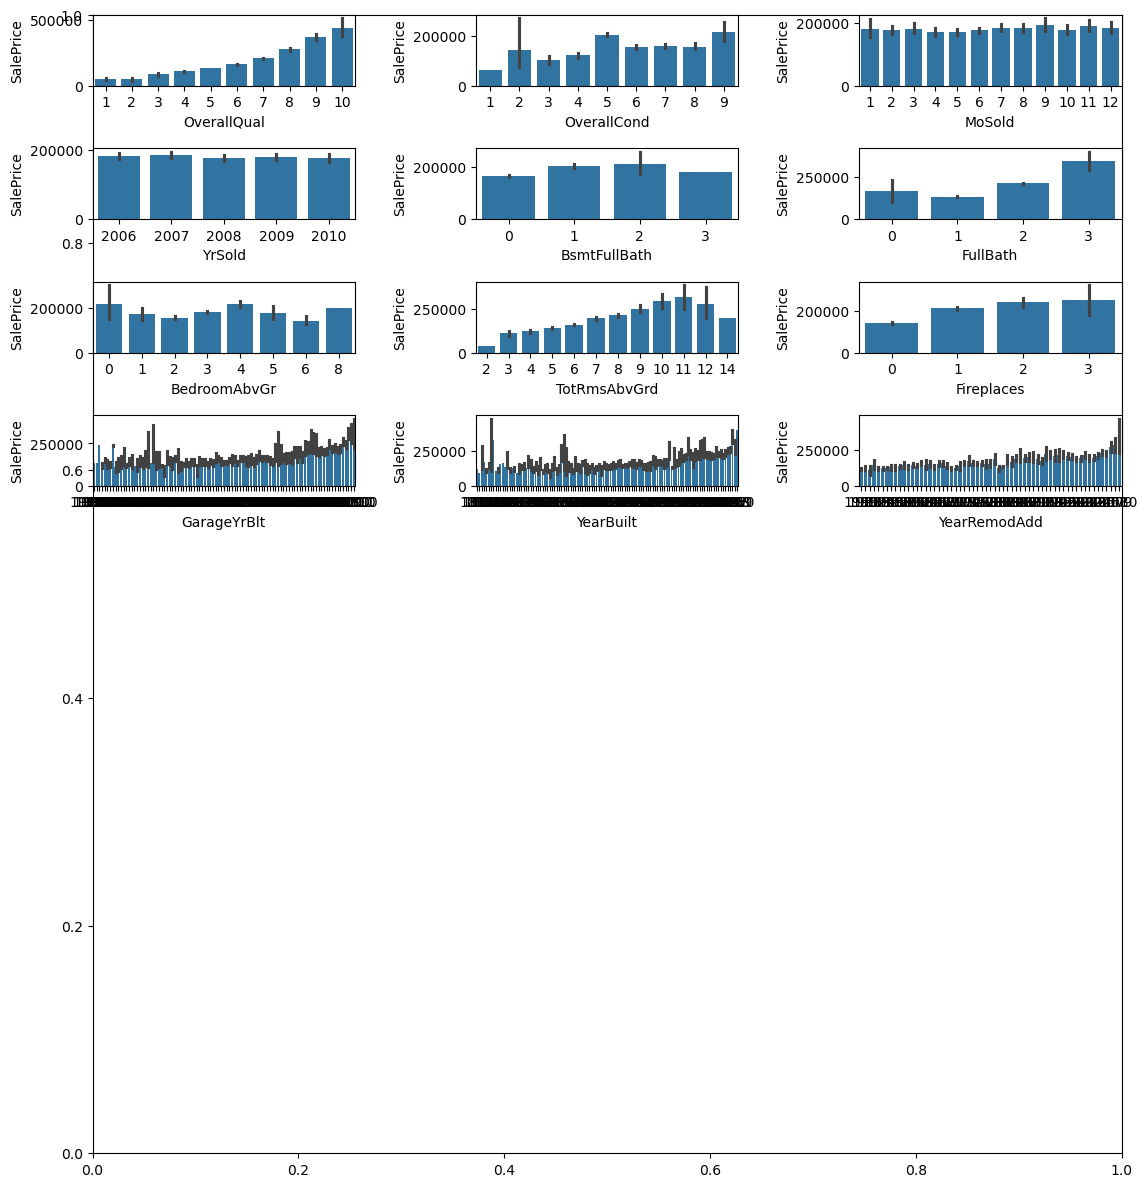

In [161]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(x=housing_df[feature], y=housing_df['SalePrice'])
    plt.tight_layout()

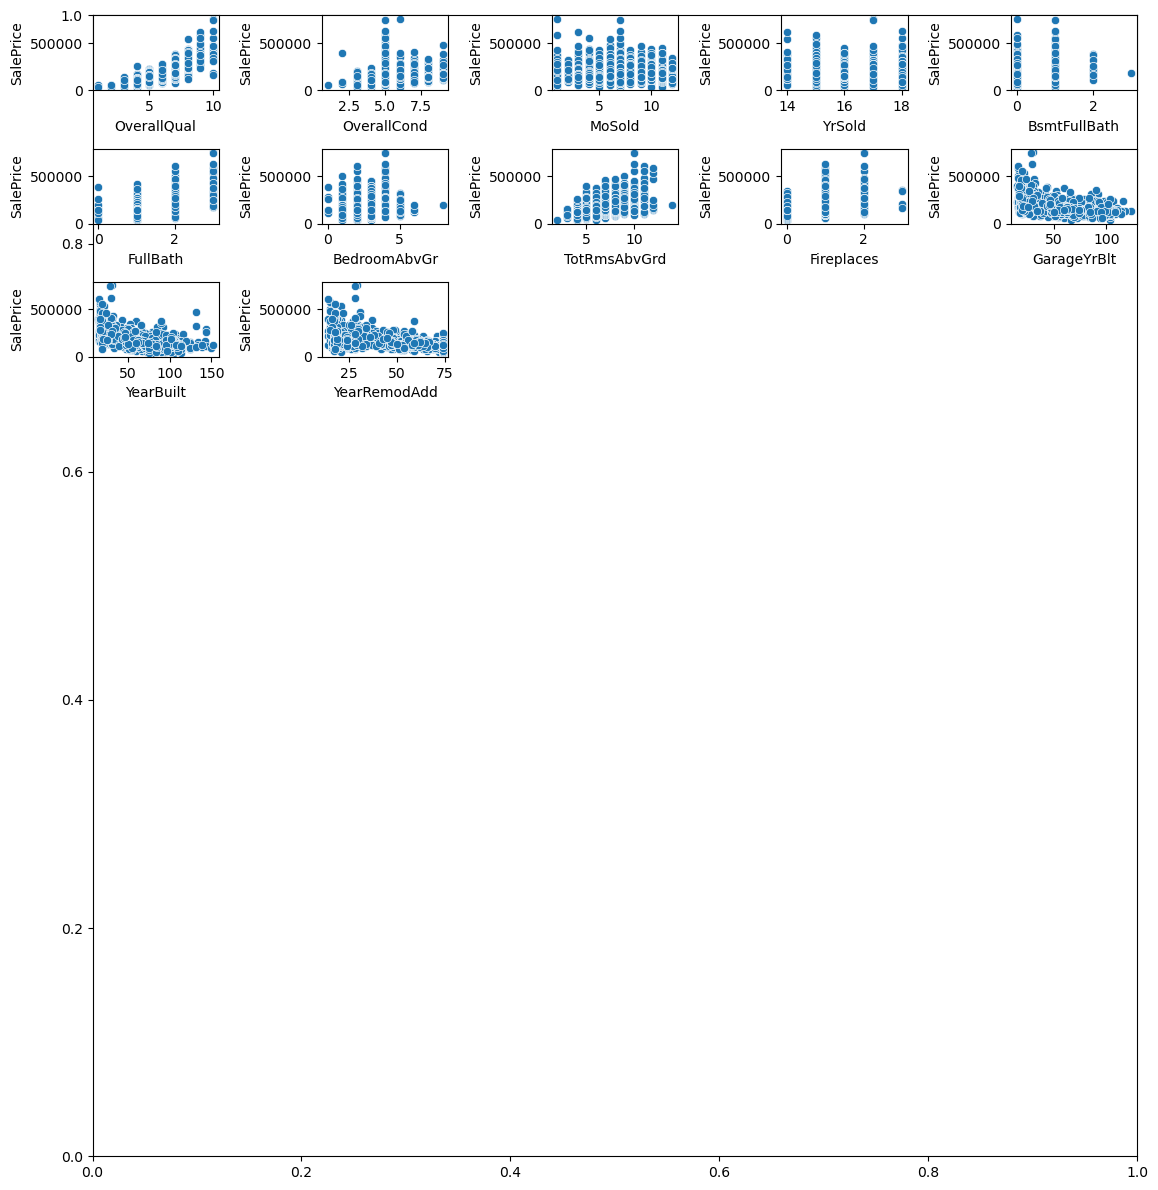

In [165]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 5, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=housing_df[feature], y=housing_df['SalePrice'])
    plt.tight_layout()

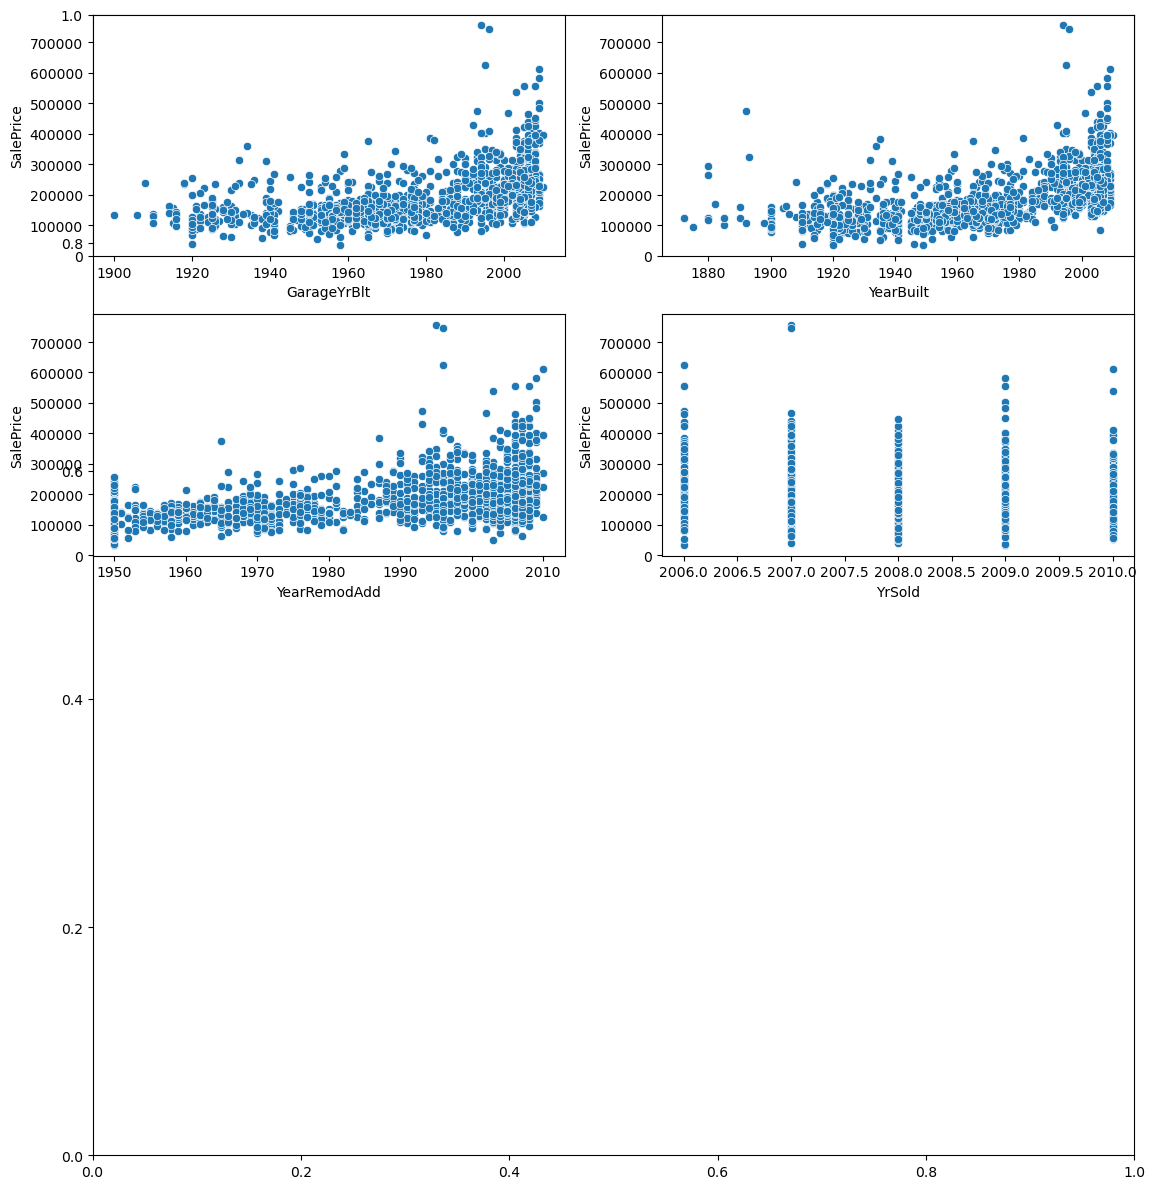

In [166]:
# Converting the year related features into number of years

for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    housing_df[feature] = 2024 - housing_df[feature]
    
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=housing_df[feature], y=housing_df['SalePrice'])
    plt.tight_layout()

In [167]:
print(" Missing Value")

for feat in housing_df.select_dtypes(exclude=['object']).columns:
    if housing_df[feat].isnull().any():
        print(feat, ' : ',  round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)
        
housing_df = housing_df[~housing_df['MasVnrArea'].isnull()]
#housing_df = housing_df.drop(['Id'], axis=1)
#numeric_df= numeric_df.drop(['Id'], axis=1)


 Missing Value
LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  6.0


In [168]:
# they have cp-frelation with other hence droping them
housing_df=housing_df.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1)
print(housing_df.columns.shape)

(66,)


In [169]:
print(housing_df.columns.shape)

(66,)


In [170]:
# List all NA columns with their count

null_count_per_column= housing_df.isnull().sum().sort_values(ascending=False)
non_zero_null_counts = null_count_per_column[null_count_per_column != 0]
non_zero_null_counts


PoolQC          1445
MiscFeature     1398
Alley           1362
Fence           1171
MasVnrType       864
FireplaceQu      686
LotFrontage      257
GarageFinish      81
GarageQual        81
GarageCond        81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
Electrical         1
dtype: int64

In [171]:
# Fix all NA values of the above reports numbers for the columns

#selected_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
 #                   'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish',
 #                   'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond',
 #                   'BsmtFinType1', 'MasVnrArea', 'Electrical']
selected_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
                    'LotFrontage', 'GarageCond', 'GarageType', 'GarageFinish',
                    'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond',
                    'BsmtFinType1', 'MasVnrArea', 'Electrical']

#Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], dtype='object')
housing_df['LotFrontage']=housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].mean())
#housing_df['GarageYrBlt']=housing_df['GarageYrBlt'].fillna(housing_df['GarageYrBlt'].mean())
housing_df['MasVnrArea']=housing_df['MasVnrArea'].fillna(housing_df['MasVnrArea'].mean())


housing_df['PoolQC'] = housing_df['PoolQC'].fillna('NONE')
housing_df['Alley'] = housing_df['Alley'].fillna('NONE')
housing_df['Fence'] = housing_df['Fence'].fillna('NONE')
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].fillna('NONE')
housing_df['GarageCond'] = housing_df['GarageCond'].fillna('NONE')
housing_df['GarageType'] = housing_df['GarageType'].fillna('NONE')
housing_df['GarageFinish'] = housing_df['GarageFinish'].fillna('NONE')
housing_df['GarageQual'] = housing_df['GarageQual'].fillna('NONE')
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].fillna('NONE')
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].fillna('NONE')
housing_df['BsmtQual'] = housing_df['BsmtQual'].fillna('NONE')
housing_df['BsmtCond'] = housing_df['BsmtCond'].fillna('NONE')
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].fillna('NONE')
housing_df['MasVnrType'] = housing_df['MasVnrType'].fillna('NONE')
housing_df['LotFrontage'] = housing_df['LotFrontage'].fillna('NONE')
#housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].fillna('NONE')
housing_df['MiscFeature'] = housing_df['MiscFeature'].fillna('NONE')
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].fillna('NONE')
housing_df['Electrical'] = housing_df['Electrical'].fillna('NONE')

In [172]:
# List all NA columns with their count

null_count_per_column= housing_df.isnull().sum().sort_values(ascending=False)
non_zero_null_counts = null_count_per_column[null_count_per_column != 0]
non_zero_null_counts

Series([], dtype: int64)

In [173]:
# Create a LabelEncoder object
houses_cat = housing_df.select_dtypes(include=['object'])
houses_cat_cols = houses_cat.columns

label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in houses_cat_cols:
    housing_df[column] = label_encoder.fit_transform(houses_cat[column])



In [174]:
housing_df.shape

(1452, 66)

In [175]:
housing_df.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      1         3   
1   2          20         3         80.0     9600       1      1         3   
2   3          60         3         68.0    11250       1      1         0   
3   4          70         3         60.0     9550       1      1         0   
4   5          60         3         84.0    14260       1      1         0   

   LandContour  LotConfig  ...  WoodDeckSF  OpenPorchSF  PoolQC  Fence  \
0            3          4  ...           0           61       3      4   
1            3          2  ...         298            0       3      4   
2            3          4  ...           0           42       3      4   
3            3          0  ...           0           35       3      4   
4            3          2  ...         192           84       3      4   

   MiscFeature  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0            1       2    2008         8              4     208500  
1            1       5    2007         8              4     181500  
2            1       9    2008         8              4     223500  
3            1       2    2006         8              0     140000  
4            1      12    2008         8              4     250000  

[5 rows x 66 columns]

In [176]:
# Describe the Data
# Convert the categories to Dummies, Delete the cateogerical columns and concat created dummeies with main dataset.

#house_object.info()

houses_dummies = pd.get_dummies(houses_cat, drop_first=True)
print(houses_dummies.columns)
#housing_df=housing_df.drop(columns=houses_cat_cols)
#housing_df = pd.concat([housing_df, houses_dummies], axis=1)
#houses = houses.replace({True: 1, False: 0})
#houses.to_csv('houses_dummies.csv')
#houses.info()
#houses.describe()

#houses_tmp.info()

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'Alley_NONE', 'Alley_Pave', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=223)


In [177]:
houses_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0        False        False         True        False         True   
1        False        False         True        False         True   
2        False        False         True        False         True   
3        False        False         True        False         True   
4        False        False         True        False         True   

   Alley_NONE  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  ...  \
0        True       False         False         False          True  ...   
1        True       False         False         False          True  ...   
2        True       False         False         False         False  ...   
3        True       False         False         False         False  ...   
4        True       False         False         False         False  ...   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False           False         False         False         True   
1           False           False         False         False         True   
2           False           False         False         False         True   
3           False           False         False         False         True   
4           False           False         False         False         True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 223 columns]

In [178]:
houses_dummies=houses_dummies.replace({True: 1, False: 0})

In [179]:

housing_df.shape

(1452, 66)

In [180]:
houses_dummies.shape

(1452, 223)

In [181]:
dummies_tmp = []
for col in houses_dummies.columns:
    if houses_dummies[col].value_counts()[0]/houses_dummies.shape[0] >= 0.95:
        dummies_tmp.append(col)
        
print(dummies_tmp)
print(len(dummies_tmp))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Memb

In [182]:
# Dropping the highly imbalanced dummy variables

houses_dummies = houses_dummies.drop(dummies_tmp, axis=1)

print(houses_dummies.shape)

(1452, 88)


In [183]:
# Adding the dummy variables to the original dataframe

housing_tmp = housing_df
housing_tmp = pd.concat([housing_df,houses_dummies],axis=1)
housing_tmp1 = pd.concat([housing_df,houses_dummies],axis=1)


In [184]:
#housing_tmp.SalePrice.mean()
housing_tmp1.head()


Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      1         3   
1   2          20         3         80.0     9600       1      1         3   
2   3          60         3         68.0    11250       1      1         0   
3   4          70         3         60.0     9550       1      1         0   
4   5          60         3         84.0    14260       1      1         0   

   LandContour  LotConfig  ...  GarageCond_TA  PavedDrive_Y  PoolQC_NONE  \
0            3          4  ...              1             1            1   
1            3          2  ...              1             1            1   
2            3          4  ...              1             1            1   
3            3          0  ...              1             1            1   
4            3          2  ...              1             1            1   

   Fence_MnPrv  Fence_NONE  MiscFeature_NONE  SaleType_New  SaleType_WD  \
0            0           1                 1             0            1   
1            0           1                 1             0            1   
2            0           1                 1             0            1   
3            0           1                 1             0            1   
4            0           1                 1             0            1   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 154 columns]

In [185]:

# Dropping the redundant columns
housing_tmp1 = housing_tmp1.drop(houses_cat_cols,axis=1)

In [186]:
housing_tmp1.shape
housing_tmp1.columns
housing_tmp1.SalePrice.mean()

180615.06336088156

In [187]:
house_tmp=housing_df
#y = housing_tmp[['SalePrice']]
y = np.log(housing_df['SalePrice'])
X = housing_tmp1.drop(['SalePrice'],axis=1)
#X_train_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [188]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1161, 111)
(291, 111)
(1161,)
(291,)


In [189]:
y_train.values
X_train.values
X_train.head()
print(X_train.info())
print(X_train.columns)


<class 'pandas.core.frame.DataFrame'>
Index: 1161 entries, 1251 to 866
Columns: 111 entries, Id to SaleCondition_Partial
dtypes: float64(2), int64(109)
memory usage: 1015.9 KB
None
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'GarageCond_TA', 'PavedDrive_Y', 'PoolQC_NONE', 'Fence_MnPrv',
       'Fence_NONE', 'MiscFeature_NONE', 'SaleType_New', 'SaleType_WD',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=111)


In [190]:
# List all NA columns with their count

null_count_per_column= housing_tmp1.isnull().sum().sort_values(ascending=False)
non_zero_null_counts = null_count_per_column[null_count_per_column != 0]
non_zero_null_counts

Series([], dtype: int64)

In [191]:
X_test.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
305    306          20         80.0    10386            8            5   
338    339          20         91.0    14145            7            7   
861    862         190         75.0    11625            5            4   
198    199          75         92.0     5520            6            6   
1304  1305         160         32.0     3363            7            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageCond_TA  \
305        2004          2005       246.0        1464  ...              1   
338        1984          1998         0.0         213  ...              1   
861        1965          1965         0.0         841  ...              1   
198        1912          1950         0.0           0  ...              0   
1304       2004          2004       117.0           0  ...              1   

      PavedDrive_Y  PoolQC_NONE  Fence_MnPrv  Fence_NONE  MiscFeature_NONE  \
305              1            1            0           1                 1   
338              1            1            0           1                 0   
861              1            1            0           1                 1   
198              1            1            1           0                 1   
1304             1            1            0           1                 1   

      SaleType_New  SaleType_WD  SaleCondition_Normal  SaleCondition_Partial  
305              0            1                     1                      0  
338              0            1                     1                      0  
861              0            1                     1                      0  
198              0            1                     0                      0  
1304             0            1                     1                      0  

[5 rows x 111 columns]

In [192]:
#y_train.values.reshape(-1,1)
#X_train=X_train.values.reshape(-1,1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1161, 111)
(291, 111)
(1161,)
(291,)


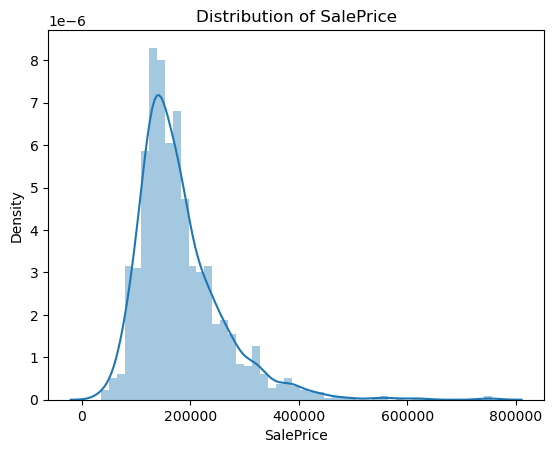

In [193]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(housing_tmp1['SalePrice'])
plt.show()

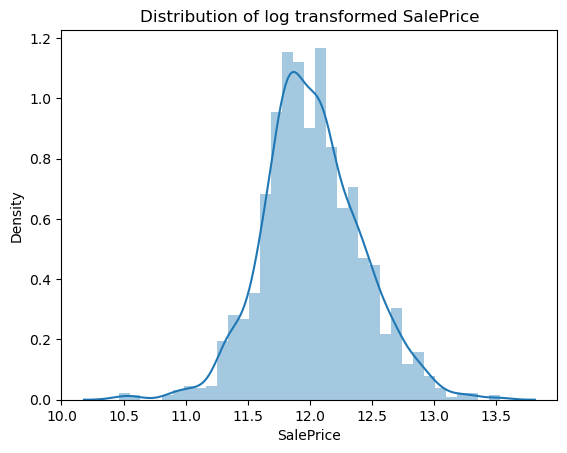

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
30      10.596635
31      11.914048
32      12.100156
33      12.016726
34      12.533576
35      12.641097
36      11.884489
37      11.938193
38      11.599103
39      11.314475
40      11.982929
41      12.043554
42      11.877569
43      11.777211
44      11.856515
45      12.675764
46      12.387085
47      12.428015
48      11.635143
49      11.751942
50      12.083905
51      11.648330
52      11.608236
53      12.860999
54      11.775290
55      12

In [194]:
sns.distplot(np.log(housing_tmp1['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()
y = np.log(housing_tmp1['SalePrice'])
print(y)

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [196]:
X_train.values

array([[1.25200000e+03, 1.20000000e+02, 7.00301255e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.94000000e+02, 1.60000000e+02, 2.40000000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.64000000e+02, 2.00000000e+01, 7.00000000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [6.02000000e+02, 5.00000000e+01, 5.00000000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.37000000e+03, 2.00000000e+01, 4.80000000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.67000000e+02, 2.00000000e+01, 6.70000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [197]:
from sklearn.preprocessing  import StandardScaler
from sklearn.preprocessing  import MinMaxScaler
scaler = StandardScaler()
scaler.fit(X_train)
sc_X_train=scaler.transform(X_train)
sc_X_test=scaler.transform(X_test)
X_sc_train = pd.DataFrame(data=sc_X_train, columns=X_train.columns)
X_sc_test = pd.DataFrame(data=sc_X_test, columns=X_test.columns)
print(X_sc_train)
print(X_sc_test)

            Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
0     1.224316    1.496945     0.006500  -0.744315     0.697594    -0.518654   
1    -1.286778    2.442448    -2.169274  -0.806848     0.697594    -0.518654   
2     0.303423   -0.866813     0.005076  -0.255961    -0.761698    -0.518654   
3    -1.063675   -0.866813     0.006500  -0.236203    -1.491344    -1.417395   
4    -0.574747   -0.866813     0.005076  -0.255961    -0.761698     0.380088   
5    -1.391209   -0.157686     0.006500  -0.428183    -0.761698    -1.417395   
6     0.030478   -0.866813    -0.514877   0.015154     0.697594    -0.518654   
7     0.236967   -0.866813    -0.467609  -0.085979    -1.491344     1.278829   
8     1.452166   -0.866813     1.092251   0.495156     1.427240    -0.518654   
9    -0.534399   -0.866813     0.241418   0.419077    -0.761698     1.278829   
10    1.471153    0.551442     1.517667  -0.025686     0.697594     0.380088   
11   -1.441051    0.078690    -0.042193 

In [199]:
from sklearn.feature_selection import RFE
def get_features(n):
    cols = []
    
    lr = LinearRegression()
    lr.fit(X_sc_train, y_train)
    rfe = RFE(lr,n_features_to_select=n)
    rfe = rfe.fit(X_sc_train, y_train)
    
   
    rfe = list(zip(X_sc_train.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe:
        if i[1]:
            cols.append(i[0])
    print(cols)
    return cols

In [200]:
# Checking top 45, 50 and 55 features
top_10 = get_features(10)
top_20 = get_features(20)
top_30 = get_features(30)

['OverallQual', 'OverallCond', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'GarageArea', 'MSZoning_RL', 'Foundation_PConc', 'FireplaceQu_NONE']
['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'GarageArea', 'MSZoning_RL', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Foundation_PConc', 'BsmtExposure_Gd', 'FireplaceQu_NONE', 'SaleCondition_Normal', 'SaleCondition_Partial']
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'TotRmsAbvGrd', 'GarageArea', 'MSZoning_RL', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'MasVnrType_BrkFace', 'MasVnrType_NONE', 'MasVnrType_Stone', 'Foundation_PConc', 'BsmtExposure_Gd', 'BsmtFinType1_Unf', 'Functional_Typ', 'FireplaceQu_NONE', 'GarageType_NONE', 'GarageFini

In [201]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features

def getsummary(X_train,y_train,columns):
    X_sm = sm.add_constant(X_train[columns])
    lin = sm.OLS(y_train.values.reshape(-1,1), X_sm).fit()
    print(lin.summary()) 

In [202]:
getsummary(X_sc_train,y_train,top_10)
getsummary(X_sc_train,y_train,top_20)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     615.7
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:18:23   Log-Likelihood:                 517.65
No. Observations:                1161   AIC:                            -1013.
Df Residuals:                    1150   BIC:                            -957.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.0125      0.005  

In [203]:
y_train

1251    12.053795
193     11.775290
863     11.794338
287     11.385092
493     11.951180
149     11.652687
748     12.469974
835     11.759786
1347    12.554837
510     12.013095
1355    12.043554
128     11.951180
61      11.522876
182     11.695247
786     11.842229
1365    12.283034
860     12.154516
293     12.367341
680     11.870600
1160    11.891362
1090    11.439279
745     12.610871
959     11.951180
1137    11.451050
126     11.759786
839     11.779129
63      11.849398
137     12.049419
621     12.388394
824     12.357076
210     11.492723
103     12.200557
1093    11.891362
865     11.908340
1208    11.849398
628     11.813030
123     11.944058
851     12.278393
1064    11.944708
12      11.877569
368     11.790557
125     11.344507
630     11.728037
139     12.352335
696     11.396392
366     11.976659
490     11.652687
1455    12.072541
1262    11.992260
1245    12.089539
184     11.751942
747     12.491173
1087    12.437184
1141    12.193494
1411    11.849398
255     12

In [204]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def get_ml(X_train, y_train, X_test, parameters, ml):
  if ml == 'ridge':
    model = Ridge()
  else:
    model = Lasso()
  cv = GridSearchCV(estimator = model, 
                          param_grid = parameters, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  cv.fit(X_train, y_train)
  al = cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, al))
  f_model = cv.best_estimator_

  f_model.fit(X_train, y_train)
  y_train_pred = f_model.predict(X_train)
  y_test_pred = f_model.predict(X_test)
 
  # Model Evaluation
  print(model," for alfa= ",al)
 
  print('R2score y_train : ',r2_score(y_train,y_train_pred))
  print('R2score y_test : ',r2_score(y_test,y_test_pred))
  print('mean_squared_error (y_train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('mean_squared_error (y_test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return f_model, y_test_pred, y_train_pred

In [205]:
params = {'alpha': np.logspace(-5, 5, num=100)}

ridge_model, y_test_rdg_predicted, y_train_rdg_pred = get_ml(X_sc_train, y_train, X_sc_test, params, 'ridge')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Optimum alpha for Ridge() is 58.570208
Ridge()  for alfa=  58.57020818056661
R2score y_train :  0.8876928898843838
R2score y_test :  0.9015772169101854
mean_squared_error (y_train) :  0.13087548216572598
mean_squared_error (y_test) :  0.134876679146378


In [206]:

params = {'alpha': np.logspace(-5, 5, num=100)}

lasso_model, y_test_predicted_lasso,y_train_pred_lasso = get_ml(X_sc_train, y_train, X_sc_test, params, 'lasso')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Optimum alpha for Lasso() is 0.004229
Lasso()  for alfa=  0.0042292428743894986
R2score y_train :  0.8798001744372284
R2score y_test :  0.9015669183699351
mean_squared_error (y_train) :  0.13539623480182741
mean_squared_error (y_test) :  0.13488373542202725


In [207]:
params = {'alpha': [46.202594]}
ridge_model, y_test_rdg_predicted, y_train_rdg_pred = get_ml(X_sc_train, y_train, X_sc_test, params, 'ridge')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Optimum alpha for Ridge() is 46.202594
Ridge()  for alfa=  46.202594
R2score y_train :  0.8883443206122449
R2score y_test :  0.9019451728852387
mean_squared_error (y_train) :  0.13049536241452075
mean_squared_error (y_test) :  0.13462432318852274


In [208]:
params = {'alpha': [0.006704]}

lasso_model, y_test_predicted_lasso,y_train_pred_lasso = get_ml(X_sc_train, y_train, X_sc_test, params, 'lasso')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Optimum alpha for Lasso() is 0.006704
Lasso()  for alfa=  0.006704
R2score y_train :  0.8745196689774987
R2score y_test :  0.8971641075120809
mean_squared_error (y_train) :  0.13833831976065658
mean_squared_error (y_test) :  0.137867342581807


In [210]:
model_coefficients = pd.DataFrame(index=X_sc_test.columns)
model_coefficients.rows = X_sc_test.columns

model_coefficients['Ridge 23.101297'] = ridge_model.coef_
model_coefficients['Lasso 0.003352'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

Ridge 23.101297  Lasso 0.003352
Id                           -0.004412   -0.000000e+00
MSSubClass                   -0.023899   -1.421831e-02
LotFrontage                  -0.000911    0.000000e+00
LotArea                       0.015593    1.369035e-02
OverallQual                   0.085231    1.121782e-01
OverallCond                   0.043363    3.573686e-02
YearBuilt                     0.017169    2.609049e-02
YearRemodAdd                  0.015443    1.710967e-02
MasVnrArea                    0.000376    0.000000e+00
BsmtFinSF1                   -0.003161    0.000000e+00
BsmtUnfSF                     0.006229    0.000000e+00
1stFlrSF                      0.069543    7.031354e-02
2ndFlrSF                      0.069519    6.363129e-02
BsmtFullBath                  0.032286    2.567296e-02
FullBath                      0.017798    1.594492e-02
BedroomAbvGr                  0.006473    0.000000e+00
TotRmsAbvGrd                  0.030450    2.694286e-02
Fireplaces                    0.015447    1.637078e-02
GarageArea                    0.032766    3.974467e-02
WoodDeckSF                    0.012722    9.215515e-03
OpenPorchSF                   0.001998    0.000000e+00
MoSold                        0.001925    0.000000e+00
YrSold                       -0.007212   -0.000000e+00
MSZoning_RL                   0.024545    1.219179e-02
MSZoning_RM                  -0.006638   -1.436484e-02
Street_Pave                   0.009539    5.989989e-03
Alley_NONE                   -0.004768   -0.000000e+00
LotShape_Reg                 -0.004366   -2.451354e-03
LandContour_Lvl               0.002499   -0.000000e+00
LotConfig_CulDSac             0.011756    1.062886e-02
LotConfig_Inside             -0.005562   -0.000000e+00
Neighborhood_CollgCr         -0.008961   -0.000000e+00
Neighborhood_Edwards         -0.024540   -1.232887e-02
Neighborhood_Gilbert         -0.008103   -0.000000e+00
Neighborhood_NAmes           -0.014824   -0.000000e+00
Neighborhood_NWAmes          -0.006691   -0.000000e+00
Neighborhood_NridgHt          0.017737    1.685523e-02
Neighborhood_OldTown         -0.011197   -8.118043e-04
Neighborhood_Sawyer          -0.008784   -0.000000e+00
Neighborhood_Somerst          0.017759    9.525089e-03
Condition1_Feedr             -0.000073   -0.000000e+00
Condition1_Norm               0.020080    1.523825e-02
Condition2_Norm               0.010349    4.562913e-03
BldgType_TwnhsE               0.002834   -0.000000e+00
HouseStyle_1Story            -0.004752   -0.000000e+00
HouseStyle_2Story            -0.003541    0.000000e+00
RoofStyle_Gable              -0.031738   -3.576695e-03
RoofStyle_Hip                -0.021591    0.000000e+00
RoofMatl_CompShg              0.007849    0.000000e+00
Exterior1st_HdBoard          -0.014520   -0.000000e+00
Exterior1st_MetalSd           0.004022    0.000000e+00
Exterior1st_Plywood          -0.003202   -0.000000e+00
Exterior1st_VinylSd           0.000480    0.000000e+00
Exterior1st_Wd Sdng          -0.015925   -0.000000e+00
Exterior2nd_HdBoard           0.013998   -0.000000e+00
Exterior2nd_MetalSd           0.003802    0.000000e+00
Exterior2nd_Plywood           0.008826    0.000000e+00
Exterior2nd_VinylSd           0.007908    1.449711e-05
Exterior2nd_Wd Sdng           0.019805    0.000000e+00
MasVnrType_BrkFace            0.008832    0.000000e+00
MasVnrType_NONE               0.010899   -0.000000e+00
MasVnrType_Stone              0.005634    0.000000e+00
ExterQual_Gd                  0.003451    3.301983e-03
ExterQual_TA                 -0.010143   -8.311021e-03
ExterCond_Gd                  0.000822   -0.000000e+00
ExterCond_TA                  0.004089    0.000000e+00
Foundation_CBlock             0.008673   -0.000000e+00
Foundation_PConc              0.019238    1.626433e-02
BsmtQual_Gd                  -0.000610    0.000000e+00
BsmtQual_TA                  -0.010228   -2.094242e-03
BsmtCond_TA                   0.012765    7.203686e-03
BsmtExposure_Gd               0.020266    1.388884e-02
BsmtExpo

In [211]:
model_coefficients[['Lasso 0.003352']].sort_values(by='Lasso 0.003352', ascending=False)

Lasso 0.003352
OverallQual              1.121782e-01
1stFlrSF                 7.031354e-02
2ndFlrSF                 6.363129e-02
GarageArea               3.974467e-02
OverallCond              3.573686e-02
TotRmsAbvGrd             2.694286e-02
YearBuilt                2.609049e-02
BsmtFullBath             2.567296e-02
YearRemodAdd             1.710967e-02
Neighborhood_NridgHt     1.685523e-02
Fireplaces               1.637078e-02
Foundation_PConc         1.626433e-02
FullBath                 1.594492e-02
Condition1_Norm          1.523825e-02
SaleCondition_Partial    1.432767e-02
BsmtExposure_Gd          1.388884e-02
LotArea                  1.369035e-02
MSZoning_RL              1.219179e-02
CentralAir_Y             1.163260e-02
LotConfig_CulDSac        1.062886e-02
Functional_Typ           9.589199e-03
Neighborhood_Somerst     9.525089e-03
WoodDeckSF               9.215515e-03
GarageType_Attchd        8.391700e-03
SaleCondition_Normal     7.680300e-03
BsmtCond_TA              7.203686e-03
PavedDrive_Y             6.599220e-03
Street_Pave              5.989989e-03
PoolQC_NONE              5.283702e-03
BsmtFinType1_GLQ         4.857504e-03
Condition2_Norm          4.562913e-03
ExterQual_Gd             3.301983e-03
BsmtFinType2_Unf         2.276357e-03
FireplaceQu_Gd           2.080014e-03
GarageCond_TA            1.767421e-03
GarageQual_TA            2.403274e-04
Exterior2nd_VinylSd      1.449711e-05
FireplaceQu_TA           0.000000e+00
BsmtFinType1_BLQ         0.000000e+00
ExterCond_Gd            -0.000000e+00
ExterCond_TA             0.000000e+00
Foundation_CBlock       -0.000000e+00
SaleType_WD             -0.000000e+00
BsmtQual_Gd              0.000000e+00
SaleType_New             0.000000e+00
MiscFeature_NONE         0.000000e+00
BsmtExposure_Mn          0.000000e+00
BsmtExposure_No         -0.000000e+00
BsmtFinType1_LwQ         0.000000e+00
Fence_NONE               0.000000e+00
BsmtFinType1_Rec        -0.000000e+00
Heating_GasA            -0.000000e+00
Fence_MnPrv             -0.000000e+00
HeatingQC_Gd            -0.000000e+00
GarageFinish_RFn         0.000000e+00
Electrical_SBrkr         0.000000e+00
GarageType_Detchd       -0.000000e+00
KitchenQual_Gd           0.000000e+00
MasVnrType_Stone         0.000000e+00
GarageType_BuiltIn       0.000000e+00
Id                      -0.000000e+00
MasVnrType_NONE         -0.000000e+00
Alley_NONE              -0.000000e+00
Neighborhood_NWAmes     -0.000000e+00
MasVnrType_BrkFace       0.000000e+00
Neighborhood_NAmes      -0.000000e+00
Neighborhood_Gilbert    -0.000000e+00
Neighborhood_CollgCr    -0.000000e+00
LotConfig_Inside        -0.000000e+00
LandContour_Lvl         -0.000000e+00
YrSold                  -0.000000e+00
Condition1_Feedr        -0.000000e+00
MoSold                   0.000000e+00
OpenPorchSF              0.000000e+00
BedroomAbvGr             0.000000e+00
BsmtUnfSF                0.000000e+00
BsmtFinSF1               0.000000e+00
MasVnrArea               0.000000e+00
LotFrontage              0.000000e+00
Neighborhood_Sawyer     -0.000000e+00
Exterior2nd_MetalSd      0.000000e+00
BldgType_TwnhsE         -0.000000e+00
Exterior2nd_HdBoard     -0.000000e+00
Exterior1st_VinylSd      0.000000e+00
Exterior1st_MetalSd      0.000000e+00
Exterior1st_HdBoard     -0.000000e+00
RoofMatl_CompShg         0.000000e+00
Exterior1st_Plywood     -0.000000e+00
Exterior1st_Wd Sdng     -0.000000e+00
RoofStyle_Hip            0.000000e+00
Exterior2nd_Plywood      0.000000e+00
HouseStyle_2Story        0.000000e+00
Exterior2nd_Wd Sdng      0.000000e+00
HouseStyle_1Story       -0.000000e+00
GarageFinish_NONE       -1.530023e-18
GarageCond_NONE         -5.629367e-04
Neighborhood_OldTown    -8.118043e-04
GarageQual_NONE         -1.804525e-03
BsmtQual_TA             -2.094242e-03
LotShape_Reg            -2.451354e-03
RoofStyle_Gable         -3.576695e-03
HeatingQC_TA            -4.746125e-03
KitchenQual_TA          -4.827188e-03
GarageType_NONE         -5.025060e-03
ExterQual_TA            -8.311021

In [212]:
model_coefficients[['Lasso 0.003352']].sort_values(by='Lasso 0.003352', ascending=False).index[:10]

Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'OverallCond',
       'TotRmsAbvGrd', 'YearBuilt', 'BsmtFullBath', 'YearRemodAdd',
       'Neighborhood_NridgHt'],
      dtype='object')

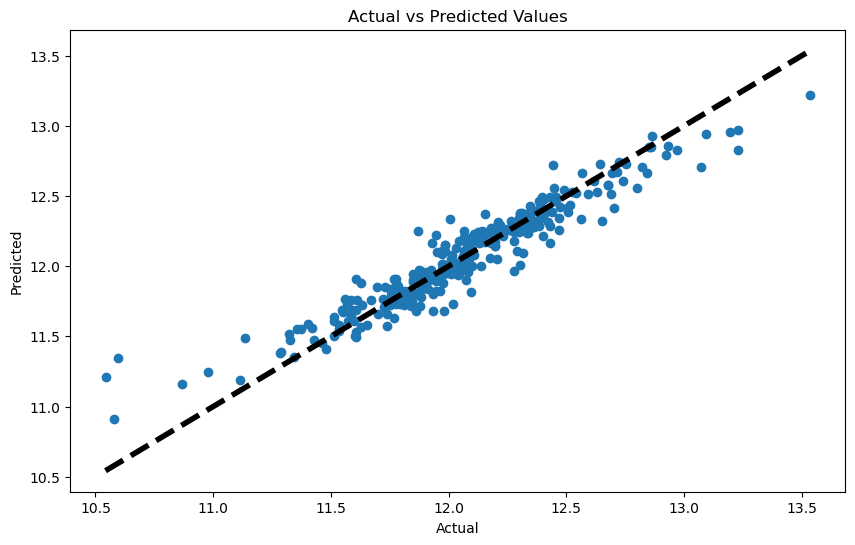

In [213]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_predicted_lasso)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

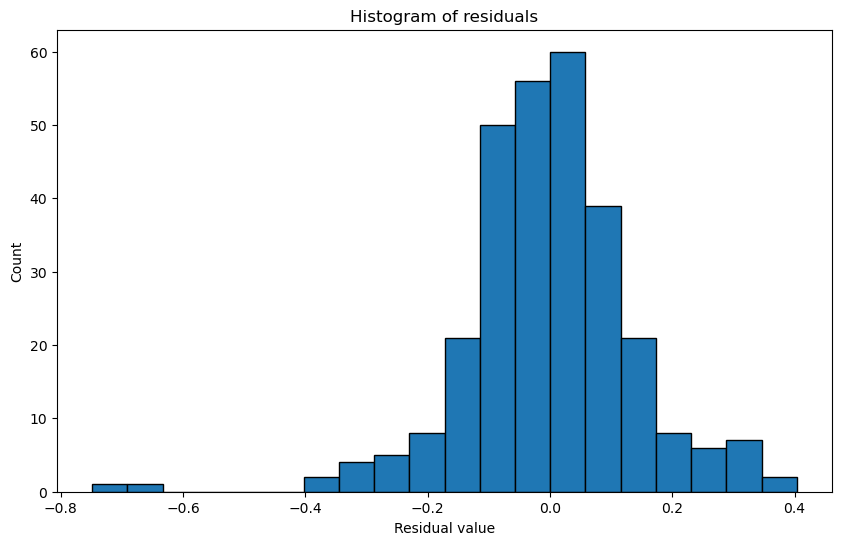

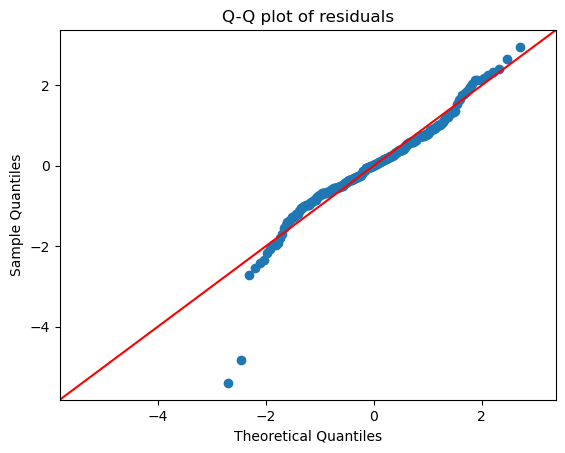

In [214]:
residuals = y_test - y_test_predicted_lasso
# Plot the histogram of the residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Histogram of residuals')
plt.xlabel('Residual value')
plt.ylabel('Count')
plt.show()

# Q-Q plot of the residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q plot of residuals')
plt.show()

Bias: 0.0191
Variance: 0.1385
MSE on Test Set: 0.0190


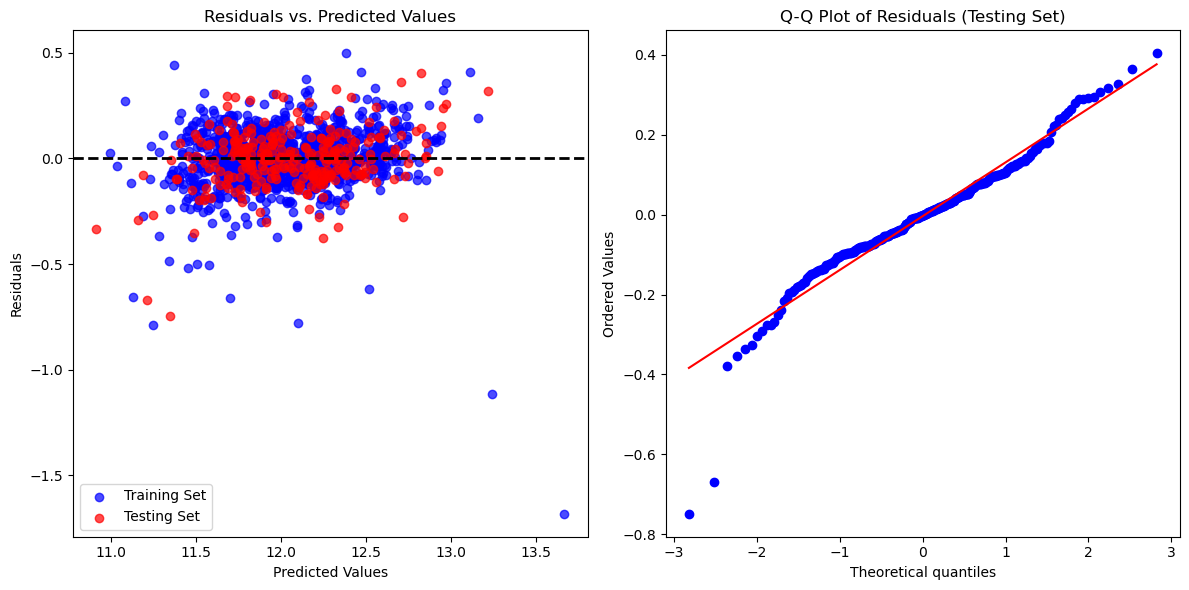

In [215]:
from scipy.stats import probplot
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on training and testing sets

# Calculate bias and variance
bias = np.mean((y_train_pred_lasso - y_train)**2)
variance = np.mean((y_test_predicted_lasso - np.mean(y_test_predicted_lasso))**2)
mse = mean_squared_error(y_test, y_test_predicted_lasso)

print("Bias: {:.4f}".format(bias))
print("Variance: {:.4f}".format(variance))
print("MSE on Test Set: {:.4f}".format(mse))

# Plot the residuals
residuals_train = y_train - y_train_pred_lasso
residuals_test = y_test - y_test_predicted_lasso

plt.figure(figsize=(12, 6))

# Residuals vs. Predicted values (Homoscedasticity check)
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_lasso, residuals_train, color='blue', alpha=0.7, label='Training Set')
plt.scatter(y_test_predicted_lasso, residuals_test, color='red', alpha=0.7, label='Testing Set')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()

# Q-Q plot (Normality check)
plt.subplot(1, 2, 2)
probplot(residuals_test, plot=plt)
plt.title('Q-Q Plot of Residuals (Testing Set)')

plt.tight_layout()
plt.show()

In [216]:
# Re-confirming if there are any null in the features.

print(X_train.isnull().sum())

print(y_train.isnull().sum())
print(X_test.isnull().sum())

print(y_test.isnull().sum())

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtUnfSF                0
1stFlrSF                 0
2ndFlrSF                 0
BsmtFullBath             0
FullBath                 0
BedroomAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
MoSold                   0
YrSold                   0
MSZoning_RL              0
MSZoning_RM              0
Street_Pave              0
Alley_NONE               0
LotShape_Reg             0
LandContour_Lvl          0
LotConfig_CulDSac        0
LotConfig_Inside         0
Neighborhood_CollgCr     0
Neighborhood_Edwards     0
Neighborhood_Gilbert     0
Neighborhood_NAmes       0
Neighborhood_NWAmes      0
Neighborhood_NridgHt     0
N

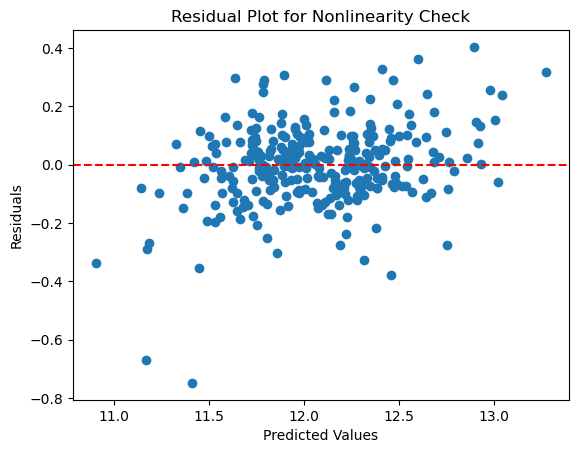

In [217]:

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get predicted values and residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred
residuals_train = y_train - y_train_pred_lasso
residuals_test = y_test - y_test_predicted_lasso

# Plot residuals against predicted values
plt.scatter(y_pred, residuals_test)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Nonlinearity Check')
plt.show()


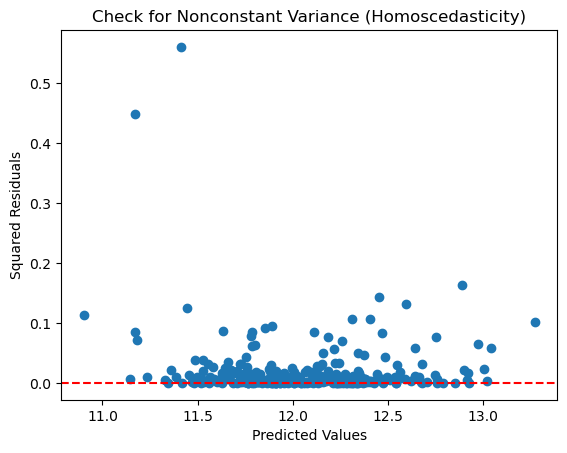

In [218]:
# Plot squared residuals against predicted values
plt.scatter(y_pred, residuals_test**2)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Squared Residuals')
plt.title('Check for Nonconstant Variance (Homoscedasticity)')
plt.show()

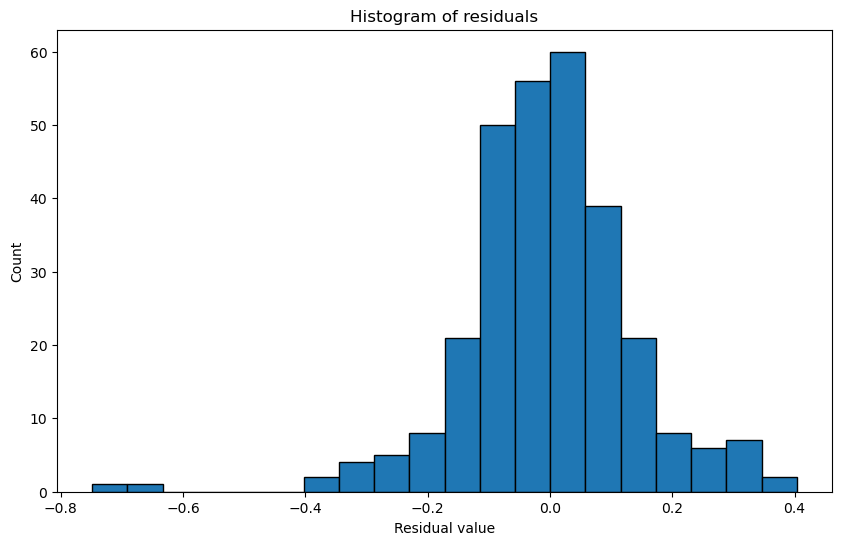

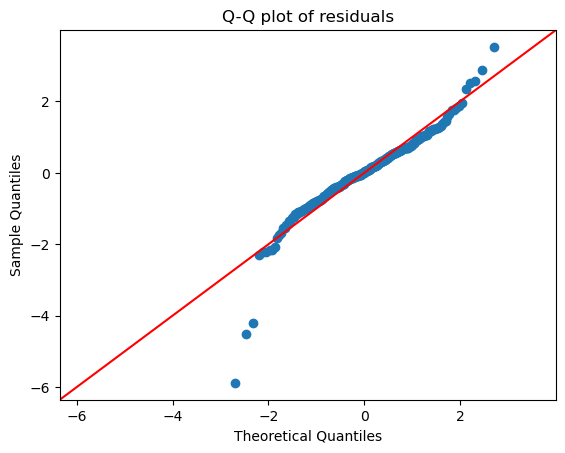

In [219]:
# Get the residuals


# Plot the histogram of the residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_test, bins=20, edgecolor='k')
plt.title('Histogram of residuals')
plt.xlabel('Residual value')
plt.ylabel('Count')
plt.show()

# Q-Q plot of the residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q plot of residuals')
plt.show()

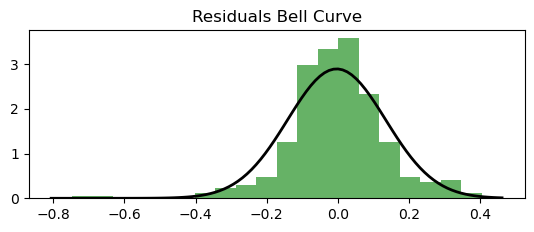

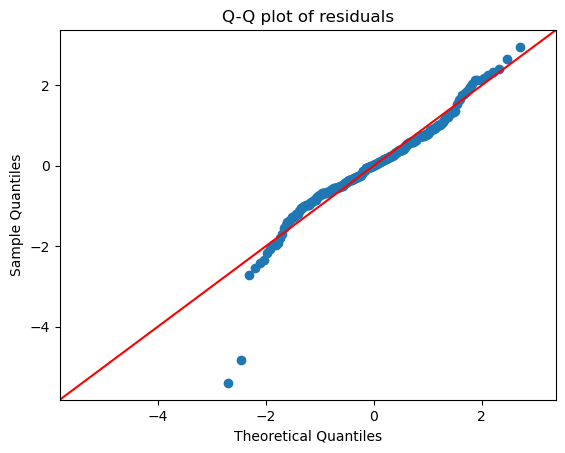

In [220]:
# There is a Positive skewness as shown in the distribution graph.
#Positive skewness might be caused by outliers in your data. 
#You could consider removing these outliers, or using a robust modeling method that is less sensitive to outliers.
# Get predicted values and residuals

# Apply a log transformation


y_pred = model.predict(X_test)
y_log = np.log1p(y_pred)
y_testlog = np.log1p(y_test)
residuals_train = y_train - y_train_pred_lasso
residuals_test = y_test - y_test_predicted_lasso
residuals = y_testlog - y_log

# Plot the histogram of the residuals
plt.subplot(2, 1, 2)
plt.hist(residuals_test, bins=20, density=True, alpha=0.6, color='g', label='Residuals Histogram')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(residuals_test), np.std(residuals_test))
plt.plot(x, p, 'k', linewidth=2, label='Residuals Bell Curve')
plt.title('Residuals Bell Curve')

# Q-Q plot of the residuals
sm.qqplot(residuals_test, line='45', fit=True)
plt.title('Q-Q plot of residuals')
plt.show()

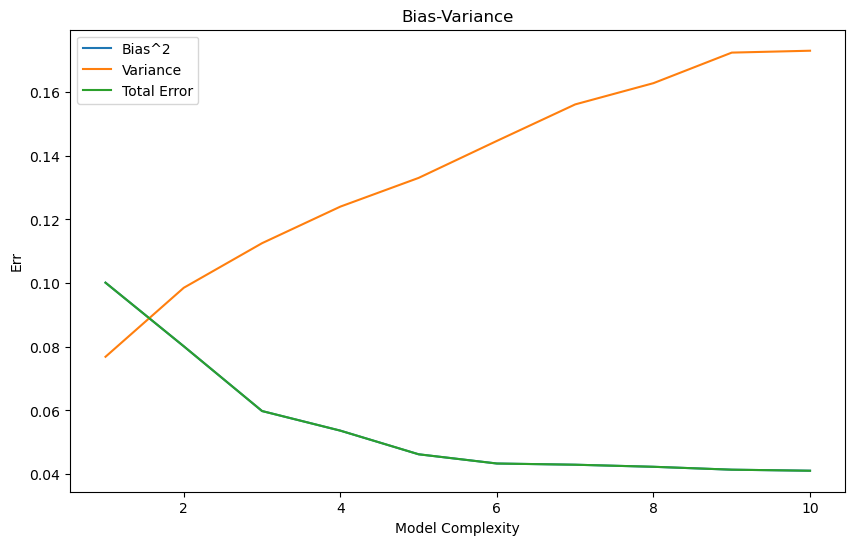

In [221]:

# Initialize bias, variance, and error lists
bias_squared_list, variance_list, error_list = [], [], []

# Define number of bootstrap samples to create
n_iterations = 10

# Define size of a bootstrap sample
size = int(0.9 * X.shape[0])

# Run bootstrap
for i in range(1, 11):
    # Initialize predictions list for this depth
    predictions = []
    # Create DecisionTreeRegressor at max_depth = i
    reg = DecisionTreeRegressor(max_depth=i)
    # Generate bootstrap samples and append predictions
    for _ in range(n_iterations):
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        predictions.append(y_pred)
    # Convert list to ndarray
    predictions = np.vstack(predictions).T
    # Calculate bias^2, variance, and error
    bias_squared = np.mean((y_test - np.mean(predictions, axis=1)) ** 2)
    variance = np.var(predictions)
    error = mean_squared_error(y_test, np.mean(predictions, axis=1))
    bias_squared_list.append(bias_squared)
    variance_list.append(variance)
    error_list.append(error)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), bias_squared_list, label='Bias^2')
plt.plot(range(1, 11), variance_list, label='Variance')
plt.plot(range(1, 11), error_list, label='Total Error')

# Adding legend and titles
plt.legend(loc='best')
plt.xlabel('Model Complexity')
plt.ylabel('Err')
plt.title('Bias-Variance')
plt.show()